In [8]:
from matplotlib import pyplot
import numpy
import pandas
import scipy.integrate
import seaborn

from context import baseline
from context import herd
import run_one

simulation #1 ended after 365 days.


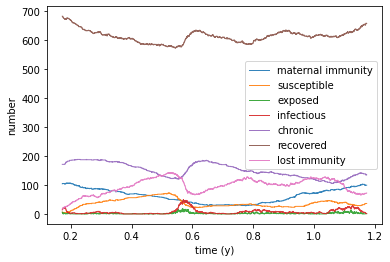

In [9]:
p = herd.Parameters(SAT=2)
RVs = herd.RandomVariables(p)

SEED = 1
TMAX = 1
data = baseline.run_one(p, SEED, tmax=TMAX, debug=False)
_ = run_one.make_plot(data)

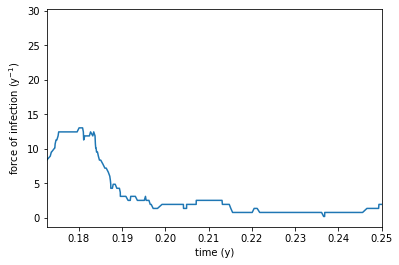

In [10]:
# The force of infection in the simulation.
force_of_infection = (RVs.transmission_rate * data['infectious']
                      + RVs.chronic_transmission_rate * data['chronic'])
ax = force_of_infection.plot()
ax.set_ylabel('force of infection (y$^{-1}$)')
ax.autoscale(enable=True, axis='x', tight=True)
_ = ax.set_xlim(right=0.25)

In [11]:
# The force of infection implied by the large-population limit of the initial conditions.
ages = numpy.linspace(0, 20, 101)
P = RVs.initial_conditions.pdf(ages)
# Integrate over age.
P = P.apply(scipy.integrate.trapz, args=(ages, ))
p.transmission_rate * P['infectious'] + p.chronic_transmission_rate * P['chronic']

8.61720058116834

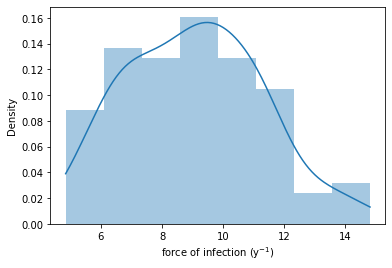

In [4]:
# The force of infection from sample initial conditions.
nsamples = 100
force_of_infection = []
for _ in range(nsamples):
    sample = RVs.initial_conditions.rvs()
    sample = {k: len(v) for (k, v) in sample.items()}
    force_of_infection.append(RVs.transmission_rate * sample['infectious']
                              + RVs.chronic_transmission_rate * sample['chronic'])

ax = seaborn.histplot(force_of_infection, stat='density',
                      kde=True, kde_kws=dict(cut=0),
                      linestyle='None', alpha=0.4)
_ = ax.set_xlabel('force of infection (y$^{-1}$)')

In [12]:
print(p)

<herd.parameters.Parameters: {'SAT': 2, 'antibody_gain_hazard': 1.8362161847603402, 'antibody_loss_hazard': 1.15728685697603, 'birth_peak_time_of_year': 0, 'birth_seasonal_coefficient_of_variation': 0.613, 'chronic_recovery_mean': 0.4931506849315068, 'chronic_recovery_shape': 3.2, 'chronic_transmission_rate': 1.095, 'female_probability_at_birth': 0.5, 'lost_immunity_susceptibility': 1, 'maternal_immunity_duration_mean': 0.37, 'maternal_immunity_duration_shape': 1.19, 'population_size': 1000, 'probability_chronic': 0.44, 'progression_mean': 0.0035616438356164386, 'progression_shape': 1.6, 'recovery_mean': 0.012602739726027396, 'recovery_shape': 8.7, 'start_time': 0.1726027397260274, 'transmission_rate': 584.0}>
